In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# --- Datos de Ejemplo para simular la Matriz de Confusión de la imagen ---
# La matriz de confusión de la imagen es:
# [[162, 4],
#  [ 11, 22]]
# Esto significa:
# Verdaderos Negativos (TN): 162 (clase 0 real, predicha como 0)
# Falsos Positivos (FP): 4  (clase 0 real, predicha como 1)
# Falsos Negativos (FN): 11 (clase 1 real, predicha como 0)
# Verdaderos Positivos (TP): 22 (clase 1 real, predicha como 1)

# Calculamos el número total de muestras reales de cada clase:
# Total de 0s reales = TN + FP = 162 + 4 = 166
# Total de 1s reales = FN + TP = 11 + 22 = 33
# Número total de muestras = 166 + 33 = 199

# Creamos las etiquetas reales (y_test)
y_test = np.array([0] * 166 + [1] * 33)

# Creamos las predicciones del modelo (predictions) para que coincidan con la matriz
predictions = []
predictions.extend([0] * 162) # Verdaderos Negativos
predictions.extend([1] * 4)  # Falsos Positivos
predictions.extend([0] * 11) # Falsos Negativos
predictions.extend([1] * 22) # Verdaderos Positivos
predictions = np.array(predictions)

# Es buena práctica barajar los datos si los generamos así,
# aunque para calcular las métricas no es estrictamente necesario.
# Sin embargo, para que y_test y predictions se correspondan en orden,
# deberíamos tener cuidado si los barajamos. En este caso,
# estamos construyendo arrays que ya cumplen las condiciones de la matriz.


print("--- Matriz de Confusión ---")
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, predictions)
print(cm)
print("\n")

# Interpretación de la matriz:
# cm[0, 0] = Verdaderos Negativos (TN)
# cm[0, 1] = Falsos Positivos (FP)
# cm[1, 0] = Falsos Negativos (FN)
# cm[1, 1] = Verdaderos Positivos (TP)
# print(f"TN: {cm[0,0]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TP: {cm[1,1]}")


print("--- Informe de Clasificación (Classification Report) ---")
# Esto proporciona un resumen completo de precisión, recall, f1-score y soporte
# para cada clase, además de la exactitud global (accuracy) y promedios.
print(classification_report(y_test, predictions))
print("\n")


print("--- Métricas Individuales ---")
# Calcula cada métrica por separado, siguiendo las fórmulas de tu imagen

# Exactitud (Accuracy): (TN + TP) / (TN + FP + FN + TP)
accuracy = accuracy_score(y_test, predictions)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

# Precisión (Precision) para la clase 1 (la "positiva" en este ejemplo): TP / (TP + FP)
precision = precision_score(y_test, predictions, pos_label=1)
print(f"Precisión (Clase 1): {precision:.2f}")

# Recall (Sensibilidad) para la clase 1: TP / (TP + FN)
recall = recall_score(y_test, predictions, pos_label=1)
print(f"Sensibilidad (Recall) (Clase 1): {recall:.2f}")

# F1 Score para la clase 1: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, predictions, pos_label=1)
print(f"Puntuación F1 (F1 Score) (Clase 1): {f1:.2f}")

--- Matriz de Confusión ---
[[162   4]
 [ 11  22]]


--- Informe de Clasificación (Classification Report) ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199



--- Métricas Individuales ---
Exactitud (Accuracy): 0.92
Precisión (Clase 1): 0.85
Sensibilidad (Recall) (Clase 1): 0.67
Puntuación F1 (F1 Score) (Clase 1): 0.75


In [2]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[162   4]
 [ 11  22]]


In [3]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199



In [4]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=1)
# ... y así sucesivamente para recall y f1_score

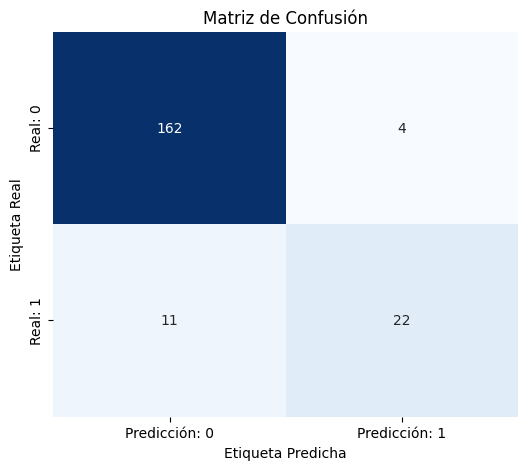

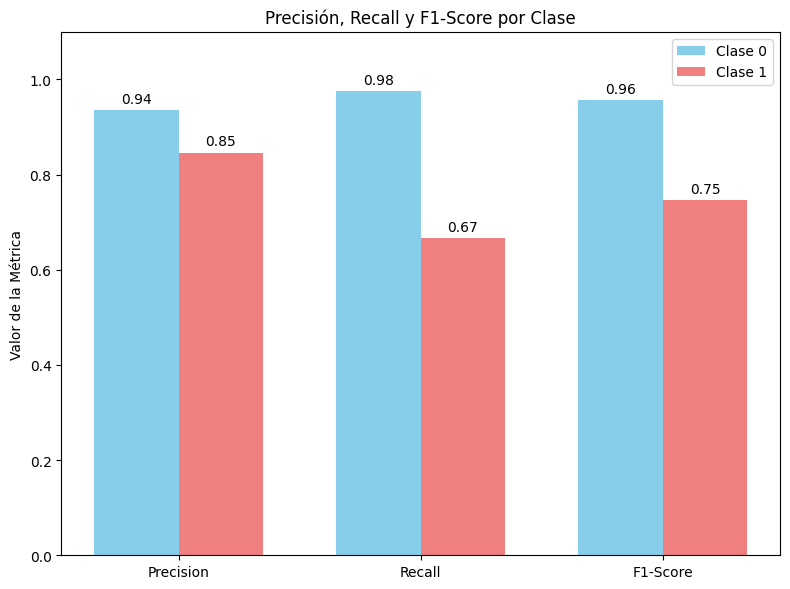

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Datos de Ejemplo (los mismos que usamos antes para coincidir con tu imagen) ---
# Matriz de confusión: [[162, 4], [11, 22]]
# Verdaderos Negativos (TN): 162
# Falsos Positivos (FP): 4
# Falsos Negativos (FN): 11
# Verdaderos Positivos (TP): 22

y_test = np.array([0] * (162 + 4) + [1] * (11 + 22))
predictions = []
predictions.extend([0] * 162) # TN
predictions.extend([1] * 4)  # FP
predictions.extend([0] * 11) # FN
predictions.extend([1] * 22) # TP
predictions = np.array(predictions)

# --- 1. Generar la Matriz de Confusión como una figura ---
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5)) # Define el tamaño de la figura
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show() # Muestra la figura


# --- Opcional: Visualización del Classification Report (un ejemplo más avanzado) ---
# Podemos intentar visualizar las métricas clave para cada clase

report = classification_report(y_test, predictions, output_dict=True)

# Extraer métricas para la clase 0 y la clase 1
metrics_0 = report['0']
metrics_1 = report['1']

labels = ['Precision', 'Recall', 'F1-Score']
class_0_values = [metrics_0['precision'], metrics_0['recall'], metrics_0['f1-score']]
class_1_values = [metrics_1['precision'], metrics_1['recall'], metrics_1['f1-score']]

x = np.arange(len(labels)) # Posiciones para las barras
width = 0.35 # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, class_0_values, width, label='Clase 0', color='skyblue')
rects2 = ax.bar(x + width/2, class_1_values, width, label='Clase 1', color='lightcoral')

# Añadir texto a las barras (los valores)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylabel('Valor de la Métrica')
ax.set_title('Precisión, Recall y F1-Score por Clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1.1) # Rango para las métricas que van de 0 a 1

plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

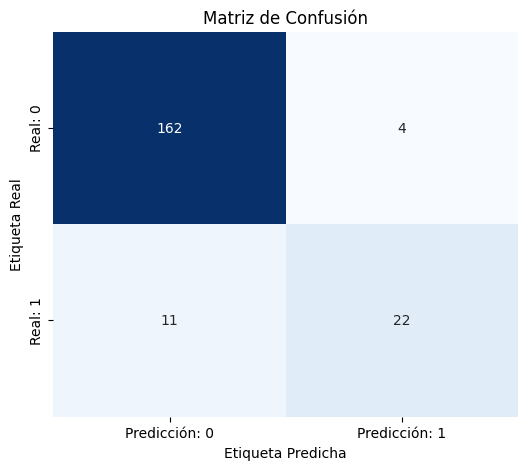

In [7]:
cm = confusion_matrix(y_test, predictions) # Calculamos la matriz

plt.figure(figsize=(6, 5)) # Crea una figura y define su tamaño (ancho, alto en pulgadas)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'])
plt.xlabel('Etiqueta Predicha') # Etiqueta para el eje X
plt.ylabel('Etiqueta Real')    # Etiqueta para el eje Y
plt.title('Matriz de Confusión') # Título del gráfico
plt.show() # Muestra el gráfico

In [8]:
auce = classification_report(y_test, predictions, output_dict=True)
print (auce)

{'0': {'precision': 0.9364161849710982, 'recall': 0.9759036144578314, 'f1-score': 0.9557522123893806, 'support': 166.0}, '1': {'precision': 0.8461538461538461, 'recall': 0.6666666666666666, 'f1-score': 0.7457627118644068, 'support': 33.0}, 'accuracy': 0.9246231155778895, 'macro avg': {'precision': 0.8912850155624722, 'recall': 0.821285140562249, 'f1-score': 0.8507574621268936, 'support': 199.0}, 'weighted avg': {'precision': 0.921448058433564, 'recall': 0.9246231155778895, 'f1-score': 0.9209298329053397, 'support': 199.0}}


In [9]:
import numpy as np

# Matriz de Confusión de la imagen
cm = np.array([
    [33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0, 33,  1,  0,  0,  0,  0,  0], # Fila 3: Real 3, Predicción 4 -> 1
    [ 0,  0,  0,  0, 44,  1,  0,  0,  0,  0], # Fila 4: Real 4, Predicción 5 -> 1
    [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]
])

num_classes = cm.shape[0]
results = {}
total_samples = np.sum(cm)

print("--- Cálculos Detallados por Clase ---")
for i in range(num_classes):
    TP_i = cm[i, i]
    FN_i = np.sum(cm[i, :]) - TP_i
    FP_i = np.sum(cm[:, i]) - TP_i
    Support_i = np.sum(cm[i, :])

    precision_i = TP_i / (TP_i + FP_i) if (TP_i + FP_i) > 0 else 0
    recall_i = TP_i / (TP_i + FN_i) if (TP_i + FN_i) > 0 else 0

    if (precision_i + recall_i) > 0:
        f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
    else:
        f1_score_i = 0

    results[i] = {
        'precision': precision_i,
        'recall': recall_i,
        'f1-score': f1_score_i,
        'support': Support_i
    }

    print(f"\nClase {i}:")
    print(f"  Verdaderos Positivos (TP): {TP_i}")
    print(f"  Falsos Negativos (FN): {FN_i}")
    print(f"  Falsos Positivos (FP): {FP_i}")
    print(f"  Soporte (Real): {Support_i}")
    print(f"  Precisión: {precision_i:.4f}")
    print(f"  Recall (Sensibilidad): {recall_i:.4f}")
    print(f"  F1-Score: {f1_score_i:.4f}")
print("\n" + "=" * 60 + "\n")


print("--- Resumen del Reporte de Clasificación ---")
print("{:<10} {:>10} {:>10} {:>10} {:>10}".format("Clase", "Precisión", "Recall", "F1-Score", "Soporte"))
print("-" * 60)

# Imprimir métricas por clase
for i in range(num_classes):
    res = results[i]
    print("{:<10} {:>10.4f} {:>10.4f} {:>10.4f} {:>10}".format(
        i, res['precision'], res['recall'], res['f1-score'], res['support']))

print("-" * 60)

# Calcular y imprimir Accuracy
total_correct_predictions = np.trace(cm)
accuracy = total_correct_predictions / total_samples
print("{:<10} {:>10} {:>10.4f} {:>10} {:>10}".format("accuracy", "", accuracy, "", total_samples))


# Calcular y imprimir Macro Avg
macro_precision = np.mean([results[i]['precision'] for i in range(num_classes)])
macro_recall = np.mean([results[i]['recall'] for i in range(num_classes)])
macro_f1_score = np.mean([results[i]['f1-score'] for i in range(num_classes)])
print("{:<10} {:>10.4f} {:>10.4f} {:>10.4f} {:>10}".format("macro avg", macro_precision, macro_recall, macro_f1_score, total_samples))

# Calcular y imprimir Weighted Avg
weighted_precision = np.sum([results[i]['precision'] * results[i]['support'] for i in range(num_classes)]) / total_samples
weighted_recall = np.sum([results[i]['recall'] * results[i]['support'] for i in range(num_classes)]) / total_samples
weighted_f1_score = np.sum([results[i]['f1-score'] * results[i]['support'] for i in range(num_classes)]) / total_samples
print("{:<10} {:>10.4f} {:>10.4f} {:>10.4f} {:>10}".format("weighted avg", weighted_precision, weighted_recall, weighted_f1_score, total_samples))

--- Cálculos Detallados por Clase ---

Clase 0:
  Verdaderos Positivos (TP): 33
  Falsos Negativos (FN): 0
  Falsos Positivos (FP): 0
  Soporte (Real): 33
  Precisión: 1.0000
  Recall (Sensibilidad): 1.0000
  F1-Score: 1.0000

Clase 1:
  Verdaderos Positivos (TP): 33
  Falsos Negativos (FN): 0
  Falsos Positivos (FP): 0
  Soporte (Real): 33
  Precisión: 1.0000
  Recall (Sensibilidad): 1.0000
  F1-Score: 1.0000

Clase 2:
  Verdaderos Positivos (TP): 45
  Falsos Negativos (FN): 0
  Falsos Positivos (FP): 0
  Soporte (Real): 45
  Precisión: 1.0000
  Recall (Sensibilidad): 1.0000
  F1-Score: 1.0000

Clase 3:
  Verdaderos Positivos (TP): 33
  Falsos Negativos (FN): 1
  Falsos Positivos (FP): 0
  Soporte (Real): 34
  Precisión: 1.0000
  Recall (Sensibilidad): 0.9706
  F1-Score: 0.9851

Clase 4:
  Verdaderos Positivos (TP): 44
  Falsos Negativos (FN): 1
  Falsos Positivos (FP): 1
  Soporte (Real): 45
  Precisión: 0.9778
  Recall (Sensibilidad): 0.9778
  F1-Score: 0.9778

Clase 5:
  Verdaderos